# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
nba_data = pd.read_csv('NBA.csv')
nba_data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [3]:
X = nba_data[['mp']]
y = nba_data['win_rating']

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

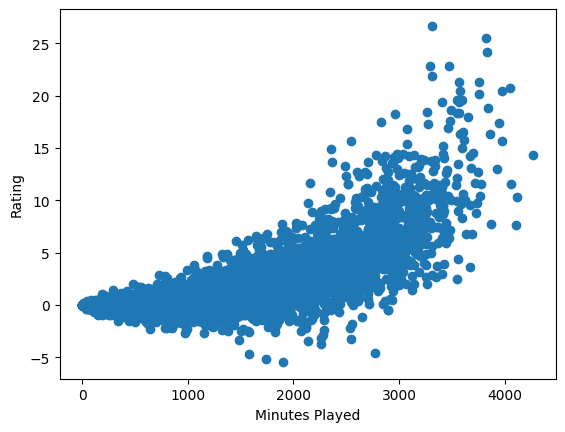

In [4]:
plt.scatter(X, y)
plt.xlabel('Minutes Played')
plt.ylabel('Rating');

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.00401688, 0.00073099, 0.00062299, 0.00063324, 0.00067306]),
 'score_time': array([0.00051117, 0.00038505, 0.0003829 , 0.0003829 , 0.00041795]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [7]:
min_score = cv_results['test_score'].min()
min_score

0.5344790822272503

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [8]:
max_score = cv_results['test_score'].max()
max_score

0.5791776193355005

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [9]:
mean_score = cv_results['test_score'].mean()
mean_score

0.5567301800068911

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

In [10]:
K = []
score = []
total_time = []

for k in range(2,21):
    cv_result = cross_validate(model, X, y, cv=k)
    total_time.append(sum(cv_result['fit_time']) + sum(cv_result['score_time']))
    K.append(k)
    score.append(cv_result['test_score'].mean())

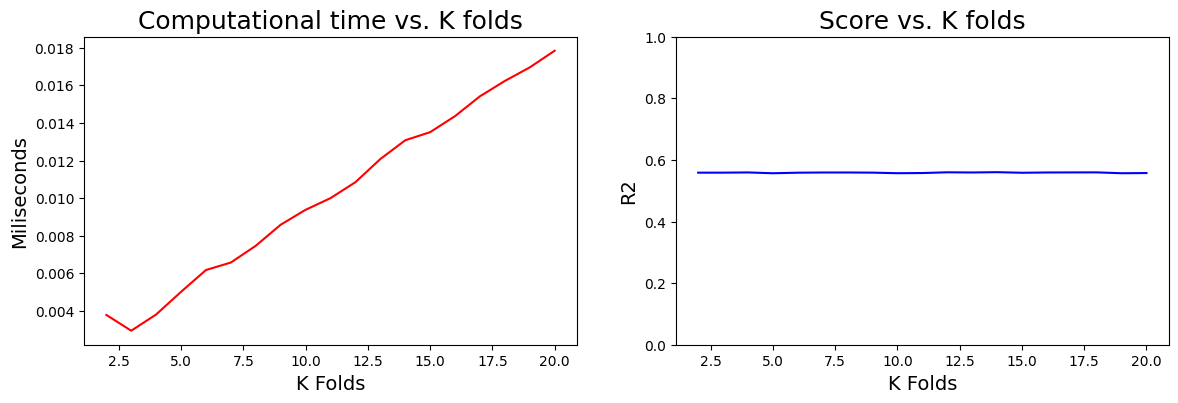

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(K, total_time, color='red')
plt.xlabel('K Folds', fontsize=14)
plt.ylabel('Miliseconds', fontsize=14)
plt.title('Computational time vs. K folds', fontsize=18)

plt.subplot(1,2,2)
plt.plot(K, score, color='blue')
plt.xlabel('K Folds', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.ylim(0,1)
plt.title('Score vs. K folds', fontsize=18);

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [12]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [13]:
slope = model.coef_[0]
slope

0.0026025799386401927

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [14]:
intercept = model.intercept_
intercept

-1.546374937163944

🤔 Make sure you understand how to interpret these coefficients before moving on.

## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted price in a variable called `prediction`.

In [15]:
prediction = model.predict([[1000]])[0]

/Users/damlacidamkartal/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

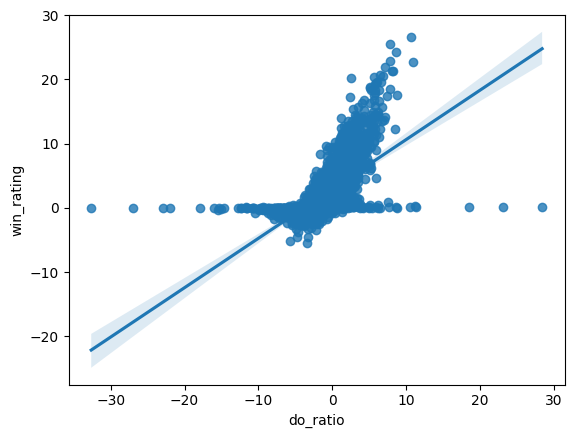

In [16]:
sns.regplot(x='do_ratio', y='win_rating', data=nba_data);

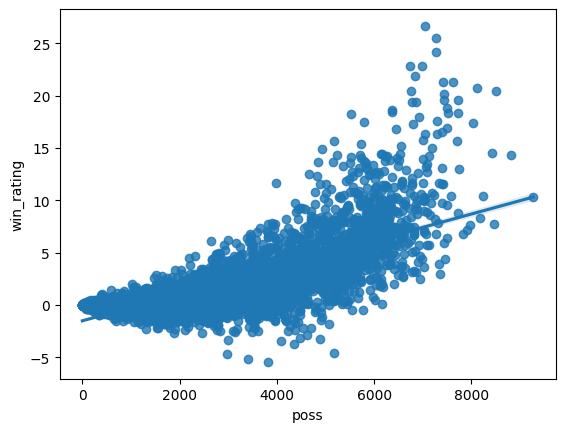

In [17]:
sns.regplot(x='poss', y='win_rating', data=nba_data);

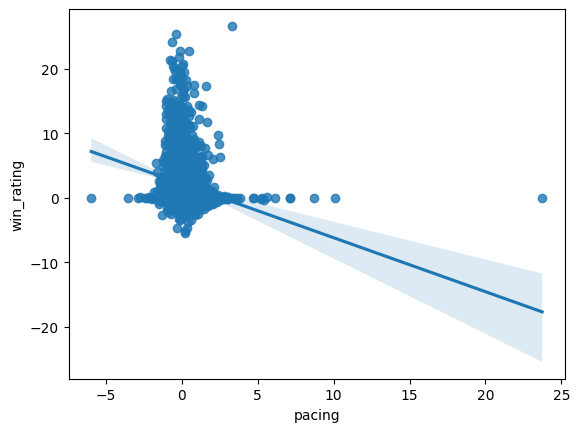

In [18]:
sns.regplot(x='pacing', y='win_rating', data=nba_data);

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [19]:
new_data = nba_data[['mp','do_ratio']]
new_data.head()

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [20]:
model = LinearRegression()
cv_res = cross_validate(model, new_data, y, cv=5)
mean_2_feat_score = cv_res['test_score'].mean()
mean_2_feat_score

0.6317728310765245

You should see an **increase of around 8%** to your $R^2$ 👏

